In [1]:
import numpy as np
import pandas as pd
import datetime
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 100

import matplotlib.pyplot as plt
%matplotlib inline

import sys, os, gc, types
import time
from subprocess import check_output

In [2]:
root_paths = [
    "/data/kaggle-wikipedia/",
    "/Users/jiayou/Dropbox/JuanCode/Kaggle/Wikipedia/",
    "/Users/jiayou/Dropbox/Documents/JuanCode/Kaggle/Wikipedia/"
]
root = None
for p in root_paths:
    if os.path.exists(p):
        root = p
        break
print(check_output(["ls", root]).decode("utf8"))

EDA data2.ipynb
EDA.ipynb
Key Modify.ipynb
LightGBM Sub5 Classifier.ipynb
LightGBM Training.ipynb
Median+Melted+ABT+.ipynb
Public Leaderboard.ipynb
README.md
RNN Overfit.ipynb
RNN Submission.ipynb
RNN.ipynb
Running Median.ipynb
Submission Verification.ipynb
data
data2
fi_gb13r0_gain.png
fi_gb7r0_gain.png
fi_gb7r0_split.png
tf-data



In [3]:
key1 = pd.read_csv(root + 'data/key_1_modified.csv')

In [3]:
train2 = pd.read_csv(root + 'data2/train_2.csv')

In [5]:
start_date = '2017-01-01'
period = 60
date_range = pd.date_range(start_date, periods=period, freq='D')
date_range = date_range.strftime('%Y-%m-%d').tolist()

In [6]:
train2 = train2.loc[:,['Page'] + date_range]

In [7]:
train2.sort_values(by='Page', inplace=True)

In [9]:
train2.reset_index(inplace=True, drop=True)

In [4]:
train2.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-22,2015-08-23,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-29,2015-08-30,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-05,2015-09-06,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-12,2015-09-13,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-19,2015-09-20,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,2015-10-11,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-17,2015-10-18,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-24,2015-10-25,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31,2015-11-01,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-07,2015-11-08,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-11-29,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-05,2015-12-06,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-12,2015-12-13,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-19,2015-12-20,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-27,2016-02-28,2016-02-29,2016-03-01,2016-03-02,2016-03-03,2016-03-04,2016-03-05,2016-03-06,2016-03-07,2016-03-08,2016-03-09,2016-03-10,2016-03-11,2016-03-12,2016-03-13,2016-03-14,2016-03-15,2016-03-16,2016-03-17,2016-03-18,2016-03-19,2016-03-20,2016-03-21,2016-03-22,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-27,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,2016-04-11,2016-04-12,2016-04-13,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,2016-05-11,2016-05-12,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,2016-06-11,2016-06-12,2016-06-13,2016-06-14,2016-06-15,2016-06-16,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2

In [15]:
train1 = pd.read_csv(root + 'data/test_prediction.gb3-r2.csv')
train1 = train1.merge(key1, how='left', on='Id')
train1 = train1.pivot(index='Page', columns='date', values='Visits')

In [17]:
train1.reset_index(inplace=True)

In [19]:
train1.sort_values(by='Page', inplace=True)

In [25]:
train1.head()

date,Page,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-14,2017-01-15,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-21,2017-01-22,2017-01-23,2017-01-24,2017-01-25,2017-01-26,2017-01-27,2017-01-28,2017-01-29,2017-01-30,2017-01-31,2017-02-01,2017-02-02,2017-02-03,2017-02-04,2017-02-05,2017-02-06,2017-02-07,2017-02-08,2017-02-09,2017-02-10,2017-02-11,2017-02-12,2017-02-13,2017-02-14,2017-02-15,2017-02-16,2017-02-17,2017-02-18,2017-02-19,2017-02-20,2017-02-21,2017-02-22,2017-02-23,2017-02-24,2017-02-25,2017-02-26,2017-02-27,2017-02-28,2017-03-01
0,!vote_en.wikipedia.org_all-access_all-agents,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,!vote_en.wikipedia.org_all-access_spider,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,!vote_en.wikipedia.org_desktop_all-agents,3.0,3.0,3.0,3.0,3.0,NaN,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,NaN,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
3,"""Awaken,_My_Love!""_en.wikipedia.org_all-access_all-agents",8211.0,7164.0,6925.0,6579.0,6011.0,6119.0,8138.0,8269.0,7033.0,6807.0,6514.0,6341.0,6524.0,8137.0,8304.0,7078.0,6801.0,6556.0,6313.0,6524.0,8136.0,8258.0,7027.0,6790.0,6487.0,6264.0,6349.0,7815.0,8027.0,6893.0,6691.0,6399.0,6059.0,6261.0,7590.0,7911.0,6747.0,6523.0,6260.0,5941.0,6077.0,7479.0,7781.0,6620.0,6399.0,6139.0,5710.0,5889.0,7351.0,7712.0,6474.0,6295.0,6016.0,5669.0,5822.0,7313.0,7685.0,6437.0,6289.0,6021.0
4,"""Awaken,_My_Love!""_en.wikipedia.org_all-access_spider",88.0,77.0,68.0,63.0,62.0,78.0,87.0,91.0,76.0,67.0,62.0,61.0,77.0,86.0,90.0,76.0,67.0,62.0,61.0,77.0,85.0,90.0,76.0,67.0,61.0,60.0,74.0,83.0,89.0,75.0,66.0,61.0,59.0,74.0,76.0,78.0,68.0,61.0,55.0,55.0,70.0,76.0,78.0,67.0,60.0,55.0,54.0,69.0,75.0,77.0,67.0,60.0,54.0,53.0,67.0,74.0,78.0,66.0,60.0,54.0


In [23]:
train1.where(train2.notnull(), np.nan, inplace = True)

In [24]:
train1.head()

date,Page,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-14,2017-01-15,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-21,2017-01-22,2017-01-23,2017-01-24,2017-01-25,2017-01-26,2017-01-27,2017-01-28,2017-01-29,2017-01-30,2017-01-31,2017-02-01,2017-02-02,2017-02-03,2017-02-04,2017-02-05,2017-02-06,2017-02-07,2017-02-08,2017-02-09,2017-02-10,2017-02-11,2017-02-12,2017-02-13,2017-02-14,2017-02-15,2017-02-16,2017-02-17,2017-02-18,2017-02-19,2017-02-20,2017-02-21,2017-02-22,2017-02-23,2017-02-24,2017-02-25,2017-02-26,2017-02-27,2017-02-28,2017-03-01
0,!vote_en.wikipedia.org_all-access_all-agents,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,!vote_en.wikipedia.org_all-access_spider,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,!vote_en.wikipedia.org_desktop_all-agents,3.0,3.0,3.0,3.0,3.0,NaN,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,NaN,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
3,"""Awaken,_My_Love!""_en.wikipedia.org_all-access_all-agents",8211.0,7164.0,6925.0,6579.0,6011.0,6119.0,8138.0,8269.0,7033.0,6807.0,6514.0,6341.0,6524.0,8137.0,8304.0,7078.0,6801.0,6556.0,6313.0,6524.0,8136.0,8258.0,7027.0,6790.0,6487.0,6264.0,6349.0,7815.0,8027.0,6893.0,6691.0,6399.0,6059.0,6261.0,7590.0,7911.0,6747.0,6523.0,6260.0,5941.0,6077.0,7479.0,7781.0,6620.0,6399.0,6139.0,5710.0,5889.0,7351.0,7712.0,6474.0,6295.0,6016.0,5669.0,5822.0,7313.0,7685.0,6437.0,6289.0,6021.0
4,"""Awaken,_My_Love!""_en.wikipedia.org_all-access_spider",88.0,77.0,68.0,63.0,62.0,78.0,87.0,91.0,76.0,67.0,62.0,61.0,77.0,86.0,90.0,76.0,67.0,62.0,61.0,77.0,85.0,90.0,76.0,67.0,61.0,60.0,74.0,83.0,89.0,75.0,66.0,61.0,59.0,74.0,76.0,78.0,68.0,61.0,55.0,55.0,70.0,76.0,78.0,67.0,60.0,55.0,54.0,69.0,75.0,77.0,67.0,60.0,54.0,53.0,67.0,74.0,78.0,66.0,60.0,54.0


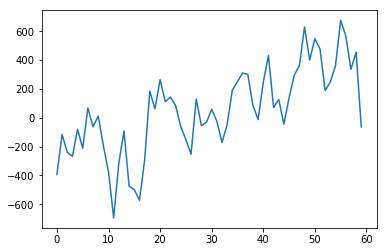

In [33]:
plt.plot((train1 == 0).sum().values[1:] - (train2 == 0).sum().values[1:])

In [38]:
((train2 == 0).values ^ (train1 == 0).values).sum()

143124

In [74]:
((train1 != 0).values & (train2 == 0).values).sum()

70065

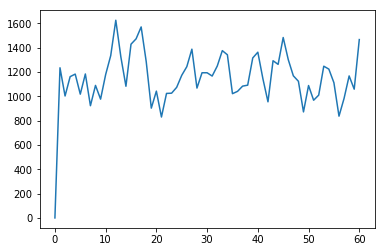

In [45]:
plt.plot(((train2 == 0).values & (train1 != 0).values).sum(axis=0))

(array([      0.,  109604.,  170025.,  164468.,  156390.,  146347.,
         134178.,  122779.,  112915.,  102978.,  181371.]),
 array([ -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
         10.]),
 <a list of 11 Patch objects>)

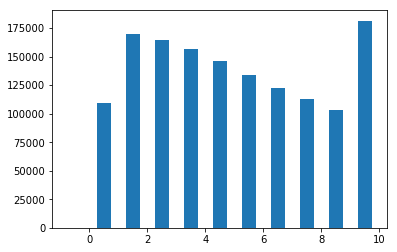

In [70]:
plt.hist(train2.values[:,1:].flatten(), bins = 11, range=(-1,10), rwidth=0.5)

(array([ 112598.,  142163.,  151704.,  138410.,  144866.,  136705.,
         125511.,  120273.,  112881.,  198857.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

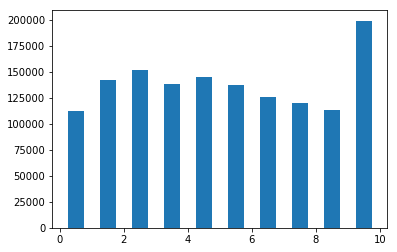

In [106]:
plt.hist(train1.values[:,1:].flatten(), bins = 10, range=(0,10), rwidth=0.5)

In [86]:
result = np.where((train2 == 0).values, train1.values, -1)

(array([ 39539.,  33382.,  15402.,   7973.,   4995.,   4519.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 6 Patch objects>)

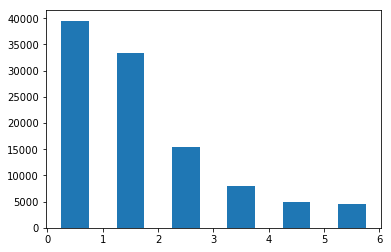

In [100]:
plt.hist(result.flatten(), bins = 6, range=(0,6), rwidth=0.5)

In [94]:
result2 = np.where((train1 == 0).values, train2.values, -1)

(array([ 39539.,  19118.,   6352.,   3191.,   2167.,   2843.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 6 Patch objects>)

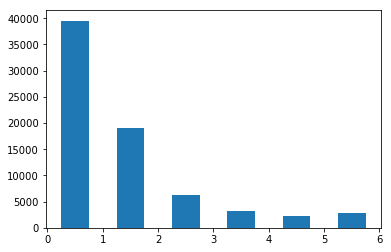

In [101]:
plt.hist(result2.flatten(), bins = 6, range=(0,6), rwidth=0.5)

In [112]:
(train1.values[:,1:] <=10).flatten().sum()

1383968

In [113]:
from sklearn.datasets import load_digits

In [114]:
X, y = load_digits(10, True)

In [120]:
y.dtype

dtype('int64')

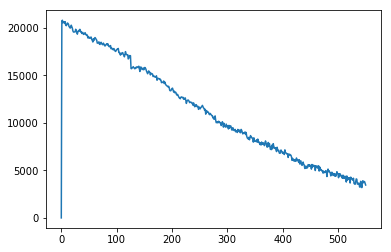

In [20]:
plt.plot(train.isnull().sum().values)

In [21]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-22,2015-08-23,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-29,2015-08-30,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-05,2015-09-06,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-12,2015-09-13,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-19,2015-09-20,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,2015-10-11,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-17,2015-10-18,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-24,2015-10-25,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-10-31,2015-11-01,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-07,2015-11-08,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-28,2015-11-29,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-05,2015-12-06,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-12,2015-12-13,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-19,2015-12-20,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-20,2016-02-21,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-27,2016-02-28,2016-02-29,2016-03-01,2016-03-02,2016-03-03,2016-03-04,2016-03-05,2016-03-06,2016-03-07,2016-03-08,2016-03-09,2016-03-10,2016-03-11,2016-03-12,2016-03-13,2016-03-14,2016-03-15,2016-03-16,2016-03-17,2016-03-18,2016-03-19,2016-03-20,2016-03-21,2016-03-22,2016-03-23,2016-03-24,2016-03-25,2016-03-26,2016-03-27,2016-03-28,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,2016-04-08,2016-04-09,2016-04-10,2016-04-11,2016-04-12,2016-04-13,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,2016-04-26,2016-04-27,2016-04-28,2016-04-29,2016-04-30,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10,2016-05-11,2016-05-12,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22,2016-05-23,2016-05-24,2016-05-25,2016-05-26,2016-05-27,2016-05-28,2016-05-29,2016-05-30,2016-05-31,2016-06-01,2016-06-02,2016-06-03,2016-06-04,2016-06-05,2016-06-06,2016-06-07,2016-06-08,2016-06-09,2016-06-10,2016-06-11,2016-06-12,2016-06-13,2016-06-14,2016-06-15,2016-06-16,2016-06-17,2016-06-18,2016-06-19,2016-06-20,2016-06-21,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2

# page features

In [22]:
page_df = pd.DataFrame(train.Page)

In [23]:
for idx, page_str in zip(train.index, train.Page):
    page = page_str.split('_')
    page_df.loc[idx, 'domain'] = page[-3]
    page_df.loc[idx, 'access'] = page[-2]
    page_df.loc[idx, 'agent'] = page[-1]

In [24]:
page_df.head()

,Page,domain,access,agent
0,2NE1_zh.wikipedia.org_all-access_spider,zh.wikipedia.org,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,zh.wikipedia.org,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,zh.wikipedia.org,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,zh.wikipedia.org,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,zh.wikipedia.org,all-access,spider


In [25]:
page_ohe = pd.get_dummies(page_df, columns=['domain', 'access', 'agent'])

In [26]:
page_ohe.head()

,Page,domain_commons.wikimedia.org,domain_de.wikipedia.org,domain_en.wikipedia.org,domain_es.wikipedia.org,domain_fr.wikipedia.org,domain_ja.wikipedia.org,domain_ru.wikipedia.org,domain_www.mediawiki.org,domain_zh.wikipedia.org,access_all-access,access_desktop,access_mobile-web,agent_all-agents,agent_spider
0,2NE1_zh.wikipedia.org_all-access_spider,0,0,0,0,0,0,0,0,1,1,0,0,0,1
1,2PM_zh.wikipedia.org_all-access_spider,0,0,0,0,0,0,0,0,1,1,0,0,0,1
2,3C_zh.wikipedia.org_all-access_spider,0,0,0,0,0,0,0,0,1,1,0,0,0,1
3,4minute_zh.wikipedia.org_all-access_spider,0,0,0,0,0,0,0,0,1,1,0,0,0,1
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,0,0,0,0,0,0,0,0,1,1,0,0,0,1


In [27]:
page_df.to_pickle(root+'page_df.pkl')
page_ohe.to_pickle(root+'page_ohe.pkl')

# date features

In [28]:
start_date = '2015-07-01'
period = 610
date_range = pd.date_range(start_date, periods=period, freq='D')
date_range = date_range.strftime('%Y-%m-%d').tolist()

In [29]:
date_range

['2015-07-01',
 '2015-07-02',
 '2015-07-03',
 '2015-07-04',
 '2015-07-05',
 '2015-07-06',
 '2015-07-07',
 '2015-07-08',
 '2015-07-09',
 '2015-07-10',
 '2015-07-11',
 '2015-07-12',
 '2015-07-13',
 '2015-07-14',
 '2015-07-15',
 '2015-07-16',
 '2015-07-17',
 '2015-07-18',
 '2015-07-19',
 '2015-07-20',
 '2015-07-21',
 '2015-07-22',
 '2015-07-23',
 '2015-07-24',
 '2015-07-25',
 '2015-07-26',
 '2015-07-27',
 '2015-07-28',
 '2015-07-29',
 '2015-07-30',
 '2015-07-31',
 '2015-08-01',
 '2015-08-02',
 '2015-08-03',
 '2015-08-04',
 '2015-08-05',
 '2015-08-06',
 '2015-08-07',
 '2015-08-08',
 '2015-08-09',
 '2015-08-10',
 '2015-08-11',
 '2015-08-12',
 '2015-08-13',
 '2015-08-14',
 '2015-08-15',
 '2015-08-16',
 '2015-08-17',
 '2015-08-18',
 '2015-08-19',
 '2015-08-20',
 '2015-08-21',
 '2015-08-22',
 '2015-08-23',
 '2015-08-24',
 '2015-08-25',
 '2015-08-26',
 '2015-08-27',
 '2015-08-28',
 '2015-08-29',
 '2015-08-30',
 '2015-08-31',
 '2015-09-01',
 '2015-09-02',
 '2015-09-03',
 '2015-09-04',
 '2015-09-

In [30]:
date_df = pd.DataFrame(date_range, columns = ['date_str'])
date_df['date'] = pd.to_datetime(date_df.date_str)
date_df['dayofweek'] = date_df.date.dt.dayofweek
date_df['dayofmonth'] = date_df.date.dt.day
date_df['dayofyear'] = date_df.date.dt.dayofyear
date_df['month'] = date_df.date.dt.month
date_df['year'] = date_df.date.dt.year
date_df['isweekday'] = date_df.dayofweek < 5


In [35]:
date_df.shape

(610, 8)

In [33]:
date_df.to_pickle(root+'date_all_df.pkl')

In [1]:
#test_date features
test = pd.read_csv(root + 'key_1_modified.csv')
test_df = pd.DataFrame(test.date[:60].values, columns = ['date'])
test_df.date = pd.to_datetime(test_df.date)

test_df['dayofweek'] = test_df.date.dt.dayofweek
test_df['dayofmonth'] = test_df.date.dt.day
test_df['dayofyear'] = test_df.date.dt.dayofyear
test_df['month'] = test_df.date.dt.month
test_df['year'] = test_df.date.dt.year
test_df['isweekday'] = test_df.dayofweek < 5

test_df.to_csv(root+'test_date_df.csv', index = None)

NameError: name 'pd' is not defined

# plot train

In [5]:
train.fillna(0, inplace = True)

灰と幻想のグリムガル_ja.wikipedia.org_desktop_all-agents


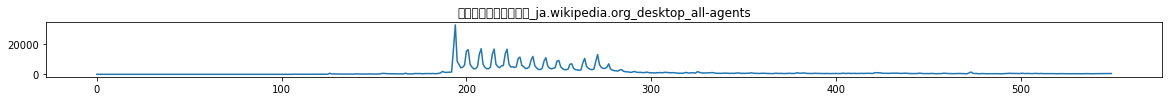

伊万卡·特朗普_zh.wikipedia.org_desktop_all-agents


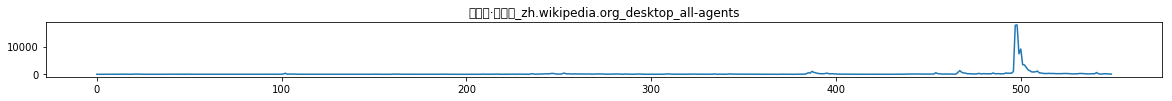

ミラクルひかる_ja.wikipedia.org_all-access_spider


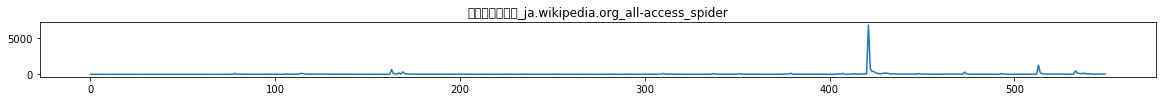

Special:MyLanguage/:Category:All_skins_www.mediawiki.org_desktop_all-agents


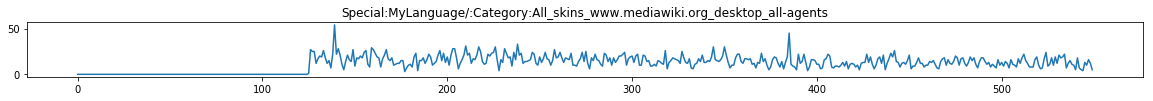

メタノール_ja.wikipedia.org_desktop_all-agents


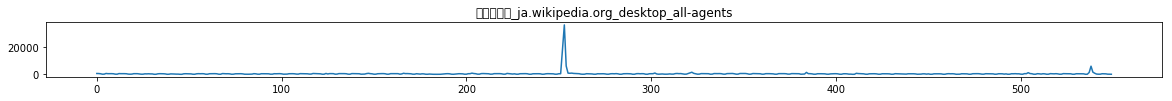

Paul_Cézanne_fr.wikipedia.org_desktop_all-agents


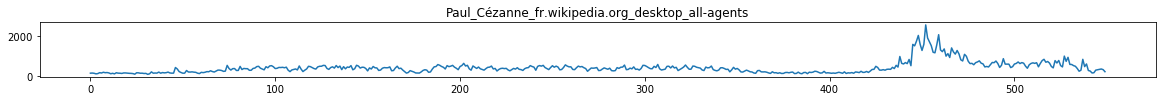

Jochen_Schweizer_(Unternehmer)_de.wikipedia.org_all-access_spider


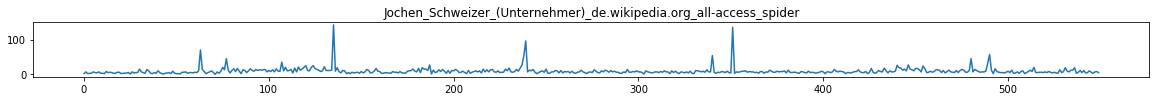

Memphis_Depay_fr.wikipedia.org_mobile-web_all-agents


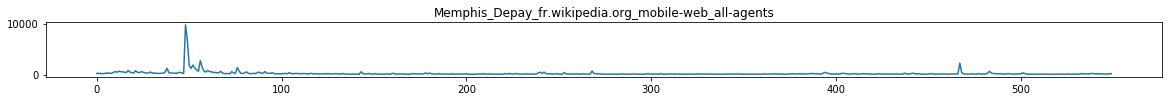

加藤あきら_ja.wikipedia.org_desktop_all-agents


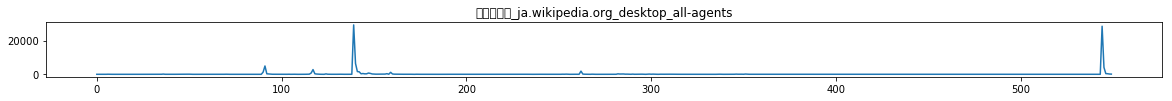

Россия_на_летних_Олимпийских_играх_2012_ru.wikipedia.org_all-access_all-agents


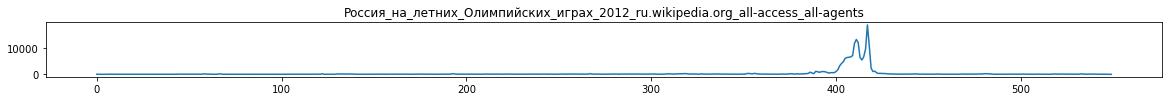

Outlander_(TV_series)_en.wikipedia.org_mobile-web_all-agents


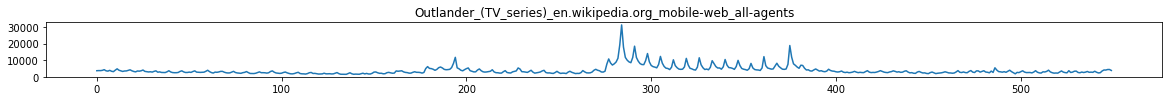

Manual:Installation_on_Uniform_Server_(Windows)/yue_www.mediawiki.org_mobile-web_all-agents


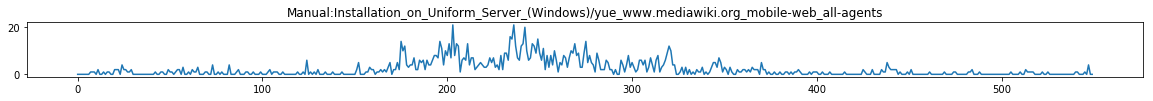

VX_(神經毒劑)_zh.wikipedia.org_all-access_spider


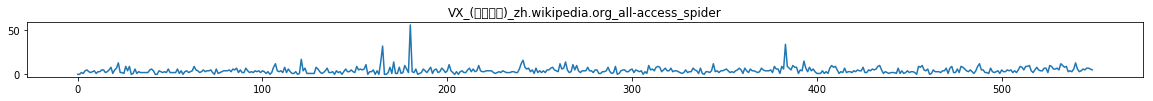

K_(動畫)_zh.wikipedia.org_all-access_all-agents


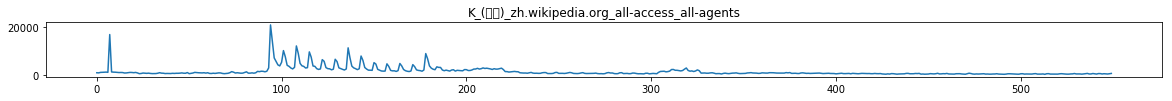

榊原良子_ja.wikipedia.org_all-access_all-agents


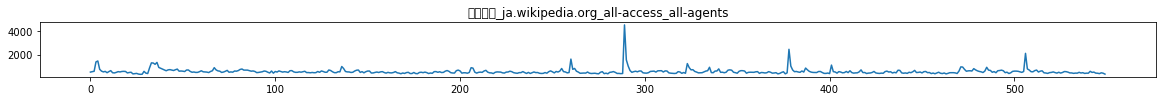

Isaac_Newton_en.wikipedia.org_mobile-web_all-agents


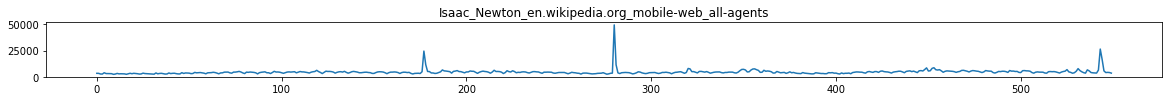

Motörhead_en.wikipedia.org_desktop_all-agents


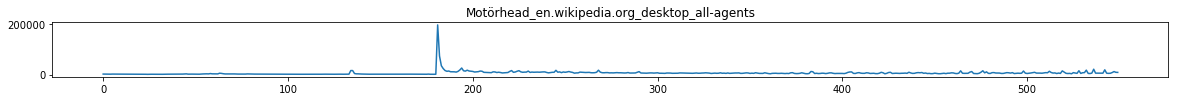

Месси,_Лионель_ru.wikipedia.org_desktop_all-agents


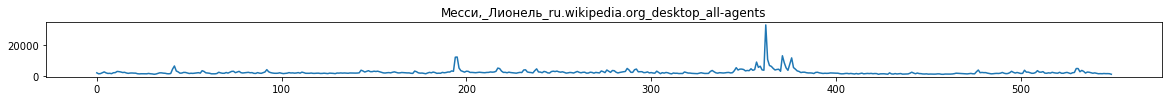

不起眼女主角培育法_zh.wikipedia.org_all-access_all-agents


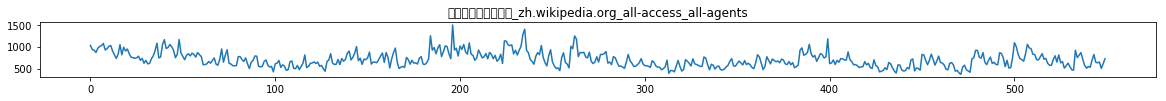

Неёлова,_Марина_Мстиславовна_ru.wikipedia.org_all-access_all-agents


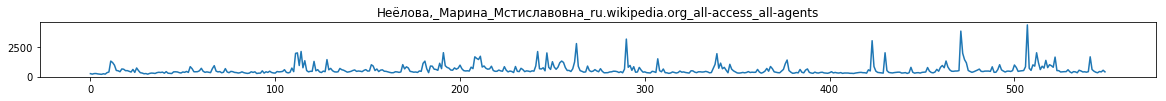

In [6]:
for i in range(20):
    y = train.iloc[np.random.randint(len(train)), :].values
    plt.figure(figsize = (20, 1))
    plt.title(y[0])
    print(y[0])
    plt.plot(y[1:])
    plt.show()


In [9]:
A = np.random.randint(0, 1000, 100000)
F = np.random.randint(0, 1000, 100000)

In [10]:
l1 = np.abs(np.log1p(A) - np.log1p(F))
smape = 2 * np.abs(A - F) / np.maximum(1, (A + F))

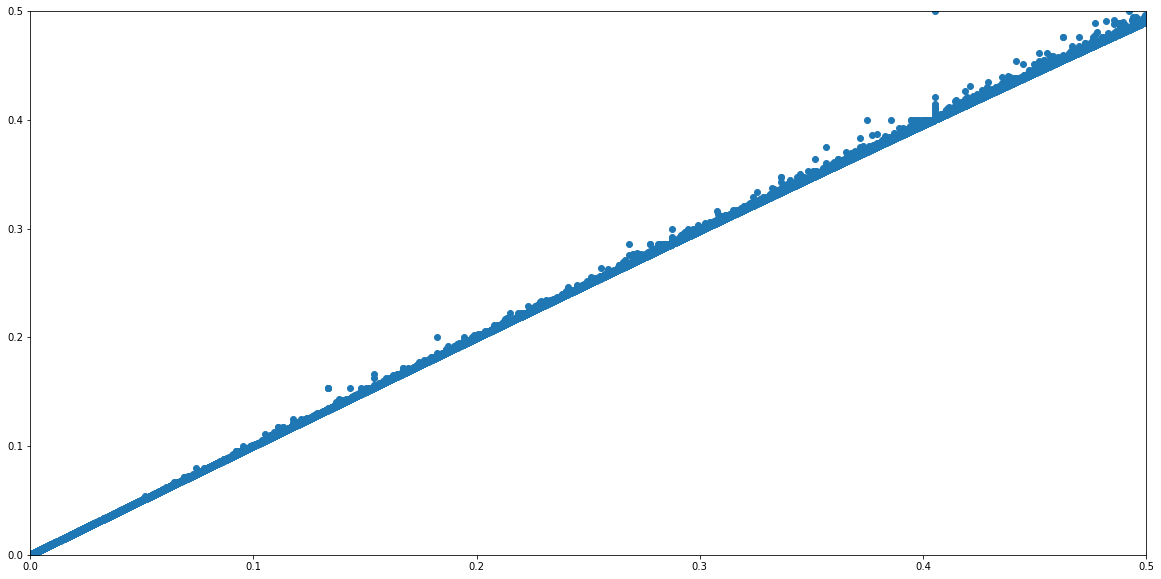

In [16]:
plt.figure(figsize = (20, 10))
plt.ylim(0, 0.5)
plt.xlim(0, 0.5)
plt.scatter(l1, smape, marker='o')